In [1]:
%plot --format svg

In [2]:
frLow = 200
frHigh = 2600
bwRadio = frHigh - frLow
costasN = 8
deltaFcostas = bwRadio/costasN

frLow =  200
frHigh =  2600
bwRadio =  2400
costasN =  8
deltaFcostas =  300


In [3]:
BWchannel = 100000
pulseSamples = pow2(ceil(log2(BWchannel * 2/deltaFcostas)))
sampleRate = pulseSamples * deltaFcostas

BWchannel =  100000
pulseSamples =  1024
sampleRate =  307200


In [4]:
costasFreq = deltaFcostas:deltaFcostas:deltaFcostas * costasN

costasFreq =

    300    600    900   1200   1500   1800   2100   2400



In [5]:
costasFreqIdx = [ 1 8 3 6 2 7 5 4 ];

In [53]:
costasFreq2 = [ 300    600    900   1500   1800   2100   2400 ];
TimeCV = [0:1/sampleRate:2/deltaFcostas](:);
RefSigCoreCV = zeros(rows(TimeCV), 1);
for idx = 1:1:columns(costasFreq2)
  RefSigCoreCV = RefSigCoreCV .+ i * exp(i*pi*TimeCV*2*costasFreq2(idx));
endfor
size(TimeCV)
size(RefSigCoreCV)

ans =

   2049      1

ans =

   2049      1



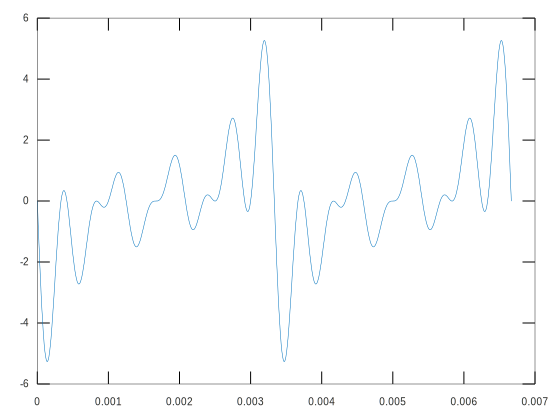

In [54]:
plot(TimeCV, RefSigCoreCV)

In [55]:
# Need raised cosine for sampling subpulse
RaisedCosineCV = (1 - cos(2*pi*TimeCV*deltaFcostas*pulseSamples/(rows(TimeCV)-1)))/2;
size(RaisedCosineCV)

ans =

   2049      1



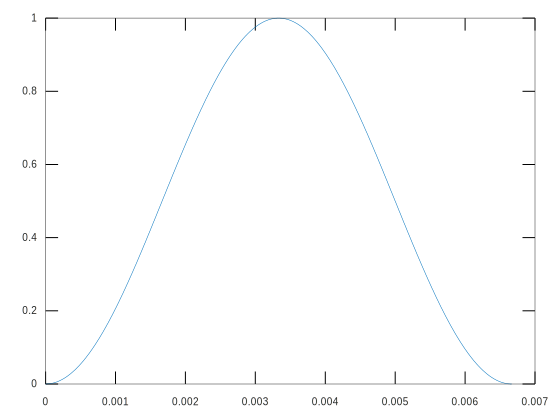

In [56]:
plot(TimeCV, RaisedCosineCV)

In [57]:
tic
freqOvr = 10; # Must be a power of 2
SigLoopCV = [RefSigCoreCV .* RaisedCosineCV](1:end-1);
FftLoopCV = fftshift(fft(SigLoopCV, rows(SigLoopCV)*freqOvr));
FreqLoopCV = linspace(-sampleRate/2, sampleRate/2, rows(FftLoopCV));
toc

Elapsed time is 0.016453 seconds.


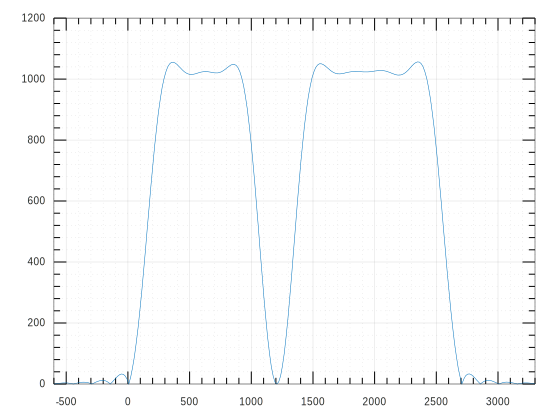

In [58]:
plot(FreqLoopCV, abs(FftLoopCV))
grid on
grid minor
axis([-600 +3300], "tic")